## A96447 MUGANGA CHARLES
### The Supervised Approach to determine the Tax Paid by each Residence in The Test Data

#### Importing the libraries

In [1]:
# Basic
import numpy as np
import pandas as pd
import warnings
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

warnings.filterwarnings('ignore')


### Importing the dataset

In [2]:
# Importing excel files
Data = pd.read_excel('HousingData.xlsx')

- Looking at the the of data am to deal with.

In [3]:
Data.head(10)

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0
5,106,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,18.7,394.12,5.21,0.0,222.0
6,107,0.08829,12.5,7.87,0.0,0.524,6.012,NaN,5.5605,5.0,15.2,395.60,12.43,0.0,311.0
7,108,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,15.2,396.90,19.15,0.0,311.0
8,109,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,15.2,386.63,29.93,0.0,311.0
9,110,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,15.2,46.70,17.10,0.0,311.0


In [4]:
Data.shape

(506, 15)

- Removing pid because it won't help in building my model.

In [5]:
Data = Data.drop(columns=['PID'])

### Dealing with missing values

In [6]:
Data.isnull().sum()

CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64

- Imputing for the missing values<br /> 
Mean for the normalized data. <br />
Median for the other categorical values.

In [7]:
Data['CRIM'].fillna(Data['CRIM'].mean(), inplace=True)
Data['LS'].fillna(Data['LS'].median(), inplace=True)
Data['PR'].fillna(Data['PR'].median(), inplace=True)
Data['RM'].fillna(Data['RM'].mean(), inplace=True)
Data['AGE'].fillna(Data['AGE'].median(), inplace=True)
Data['DIS'].fillna(Data['DIS'].mean(), inplace=True)
Data['RAD'].fillna(Data['RAD'].median(), inplace=True)
Data['PTRATIO'].fillna(Data['PTRATIO'].median(), inplace=True)
Data['DMT'].fillna(Data['DMT'].mean(), inplace=True)
Data['LSTAT'].fillna(Data['LSTAT'].median(), inplace=True)
Data['MO'].fillna(Data['MO'].median(), inplace=True)
Data['TAX'].fillna(Data['TAX'].median(), inplace=True)

In [8]:
#checking for any remaining null values
Data.isnull().sum()

CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

### Dealing with outliers.

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'AC'}>,
        <AxesSubplot: title={'center': 'LS'}>,
        <AxesSubplot: title={'center': 'PR'}>],
       [<AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>,
        <AxesSubplot: title={'center': 'RAD'}>],
       [<AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'DMT'}>,
        <AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'TAX'}>],
       [<AxesSubplot: title={'center': 'MO'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

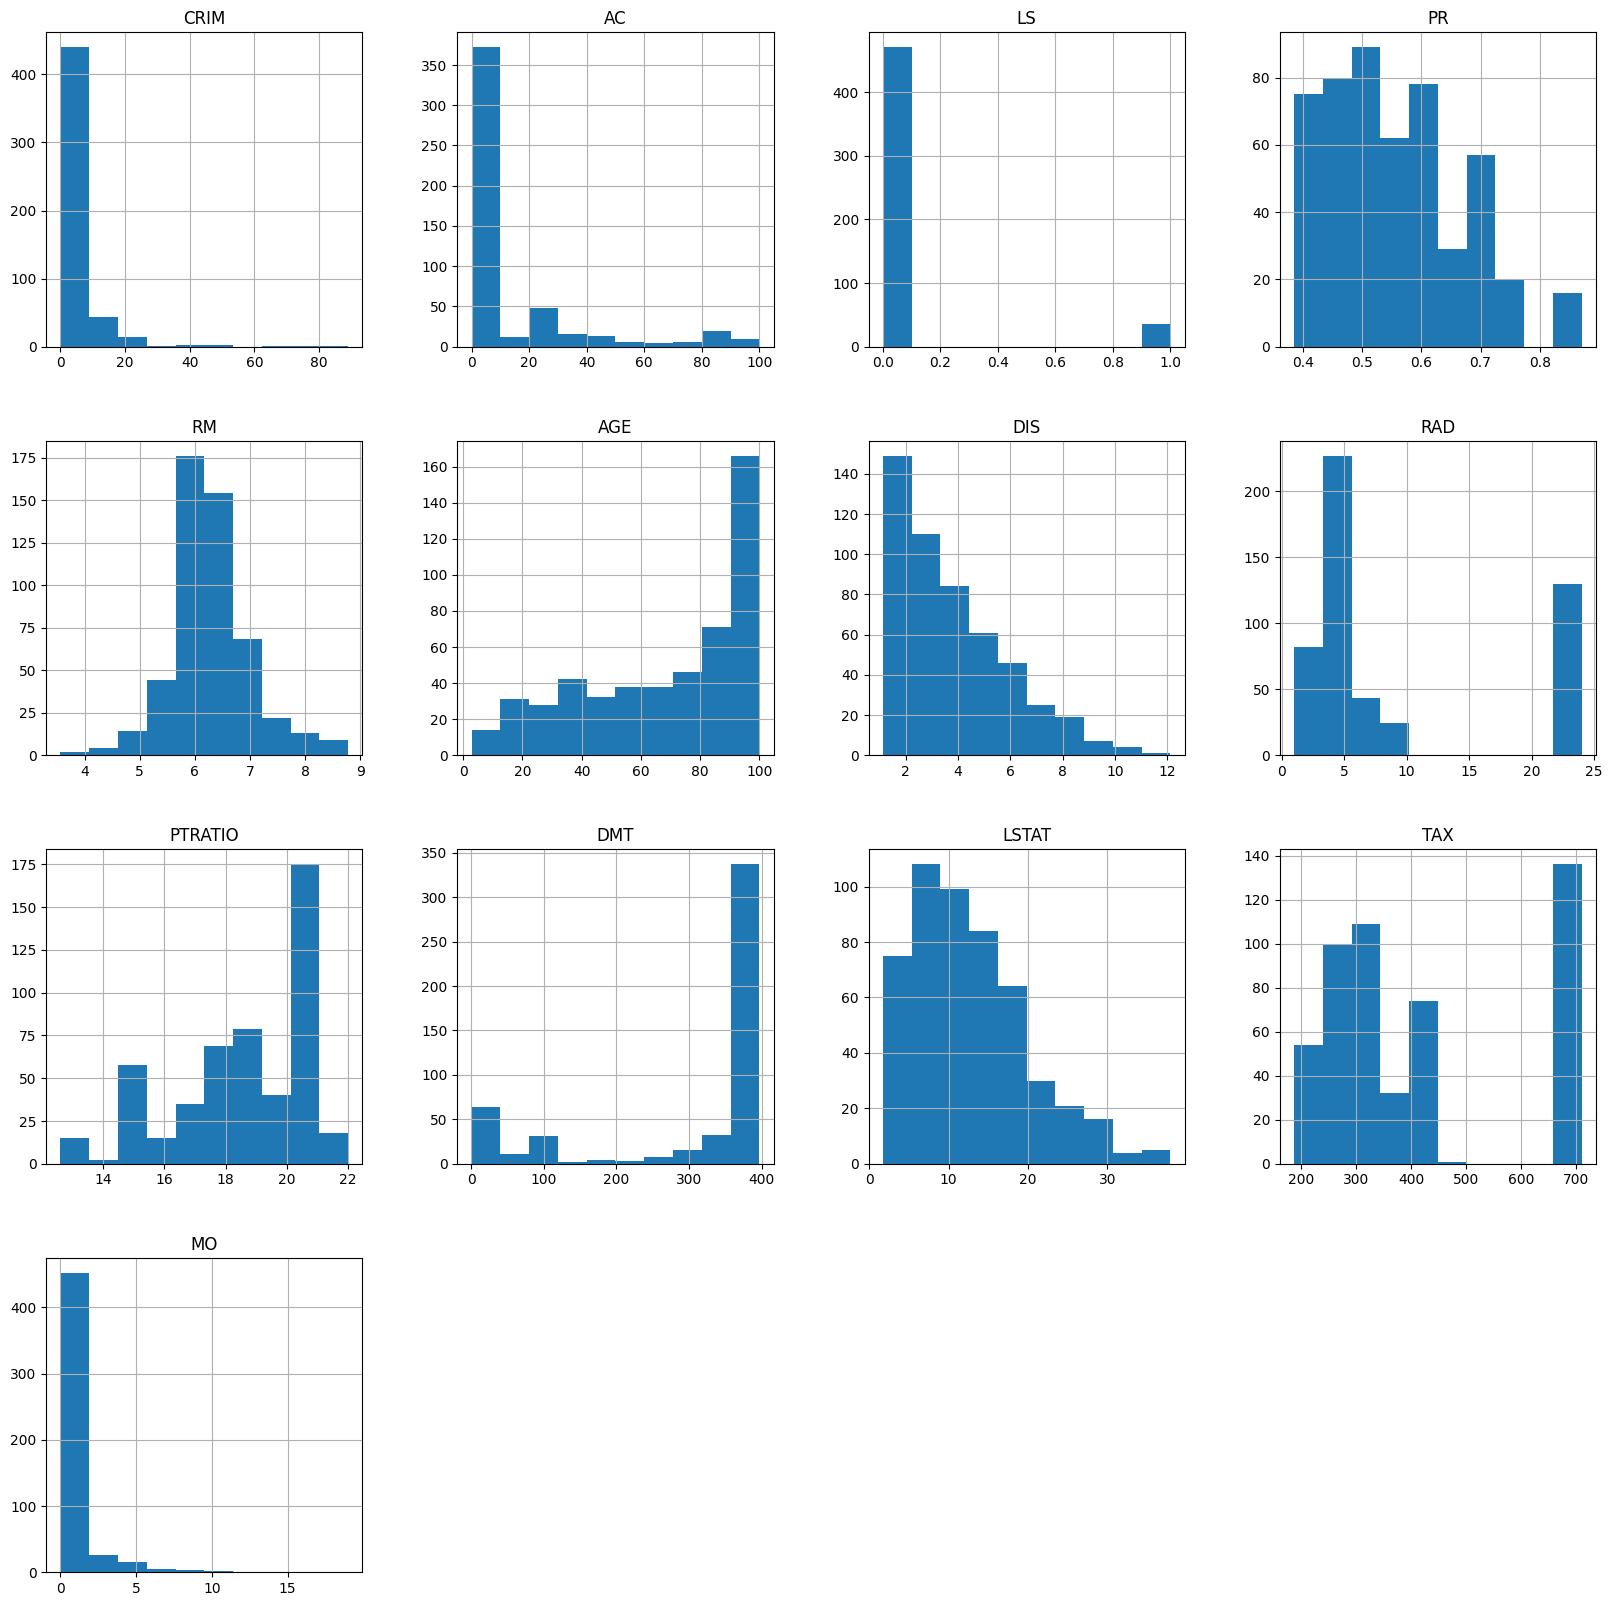

In [9]:
# Dealing with outliers
Data.hist(['CRIM','AC','LS','PR','RM','AGE','DIS','RAD','PTRATIO','DMT','LSTAT','TAX','MO'], figsize=(20,20))


In [10]:
Data['RAD'][Data['RAD']>8].sort_values()

356    24.0
452    24.0
451    24.0
450    24.0
449    24.0
       ... 
393    24.0
392    24.0
391    24.0
389    24.0
487    24.0
Name: RAD, Length: 130, dtype: float64

- Using nearest value to replace the outliers.

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'LS'}>,
        <AxesSubplot: title={'center': 'PR'}>],
       [<AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'DMT'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

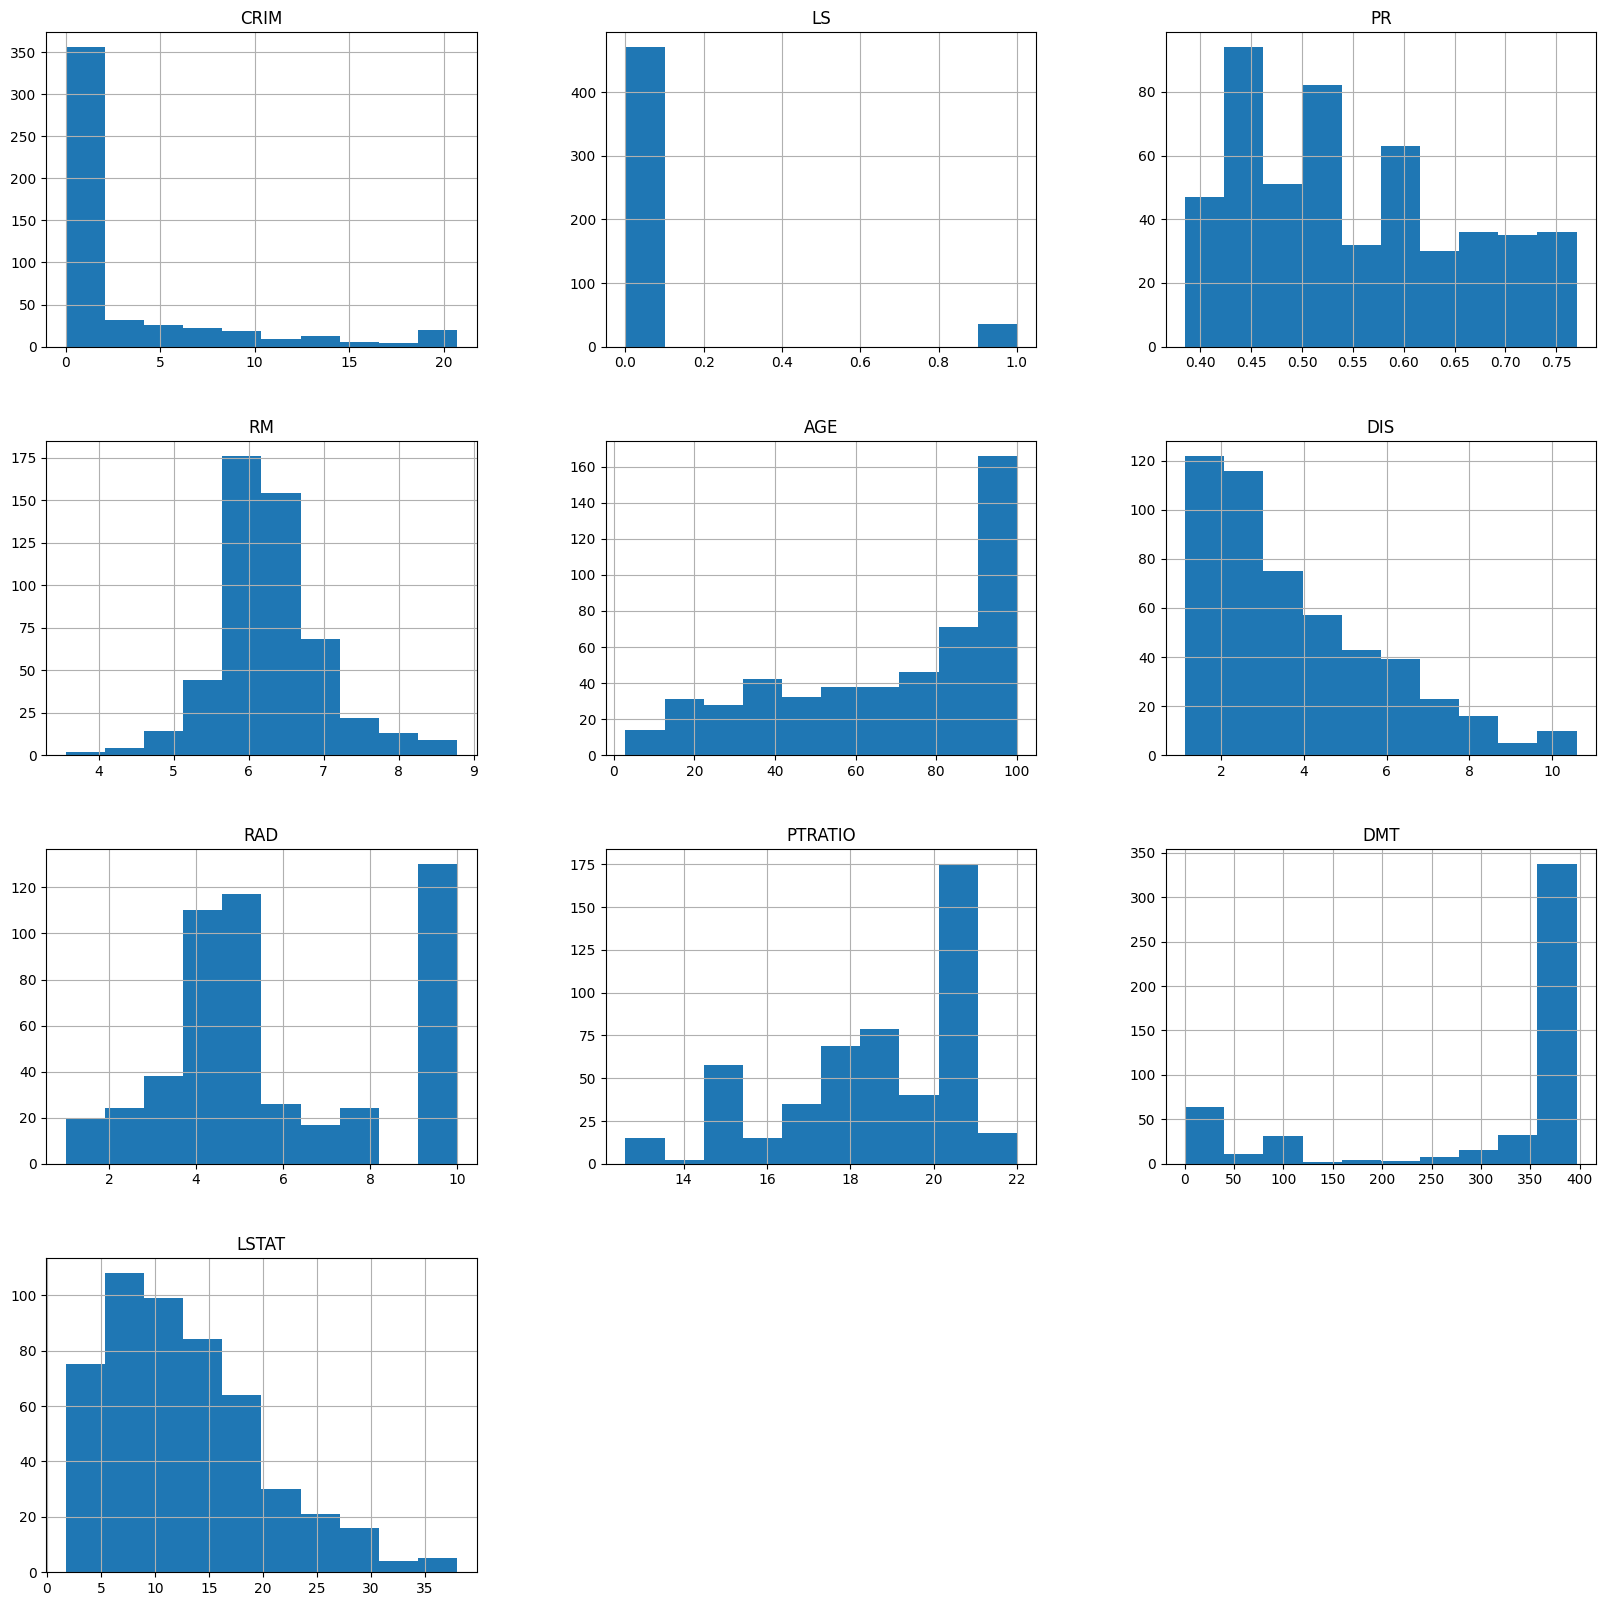

In [11]:
Data['CRIM'][Data['CRIM']>22]=20.7162
Data['PR'][Data['PR']>0.75] = 0.77
Data['DIS'][Data['DIS']>9] = 10.5857
Data['RAD'][Data['RAD']>10]=10
# plotting the data again to check for any outliers
Data.hist(['CRIM','LS','PR','RM','AGE','DIS','RAD','PTRATIO','DMT','LSTAT'], figsize=(20,20))

### Feature Engineering

In [12]:
# Checking for correlation before removing any columns
Data.corr()


,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
CRIM,1.000000,-0.269246,0.541700,-0.058909,0.602006,-0.291162,0.456182,-0.489748,0.726635,0.378229,-0.399417,0.596883,0.242596,0.767368
AC,-0.269246,1.000000,-0.533828,-0.042697,-0.537964,0.308048,-0.571822,0.665146,-0.329458,-0.390685,0.140866,-0.412876,-0.110998,-0.313302
INDUS,0.541700,-0.533828,1.000000,0.062938,0.778359,-0.387043,0.641205,-0.702807,0.516389,0.382767,-0.190794,0.603560,0.164093,0.718271
LS,-0.058909,-0.042697,0.062938,1.000000,0.078482,0.091161,0.086605,-0.099775,0.009146,-0.120718,0.093568,-0.053868,-0.084788,-0.034584
PR,0.602006,-0.537964,0.778359,0.078482,1.000000,-0.291812,0.750694,-0.786028,0.611832,0.249185,-0.240805,0.598712,0.157400,0.712007
RM,-0.291162,0.308048,-0.387043,0.091161,-0.291812,1.000000,-0.232828,0.198009,-0.174249,-0.351801,0.160991,-0.612915,-0.107370,-0.289590
AGE,0.456182,-0.571822,0.641205,0.086605,0.750694,-0.232828,1.000000,-0.738306,0.424708,0.258936,-0.131142,0.603386,0.160634,0.500388
DIS,-0.489748,0.665146,-0.702807,-0.099775,-0.786028,0.198009,-0.738306,1.000000,-0.462403,-0.226907,0.186762,-0.492026,-0.169935,-0.529405
RAD,0.726635,-0.329458,0.516389,0.009146,0.611832,-0.174249,0.424708,-0.462403,1.000000,0.386891,-0.315460,0.434613,0.174240,0.822938
PTRATIO,0.378229,-0.390685,0.382767,-0.120718,0.249185,-0.351801,0.258936,-0.226907,0.386891,1.000000,-0.174661,0.370460,0.227378,0.459693


With "TAX" as our target variable <br /> 
"RAD" (0.82),<br />
"CRIM" (0.77),<br />
"PR" (0.71),<br />
"INDUS" (0.72), and <br />
"LSTAT" (0.55). 
Are suitable  feature selection.<br />
"AGE" has relatively high correlations with several other predictors, including "INDUS" (0.641), "PR" (0.750), and "LSTAT" (0.603). <br />Because of this, I cannot include "AGE" in the regression model because it may increase the risk of multicollinearity.

In [13]:
# since it is categorical data we will user scatter plots
def Correlation_plots(plots):
    for predictor in plots:
        Data.plot.scatter(x=predictor, y='TAX', figsize=(10,5))
        plt.show()

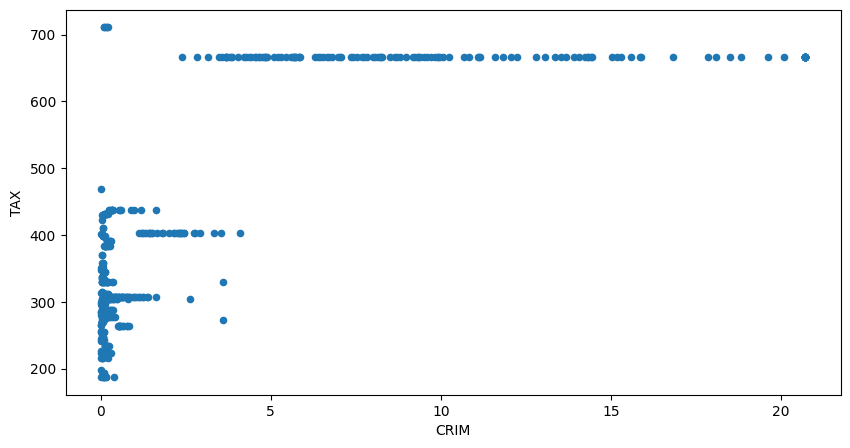

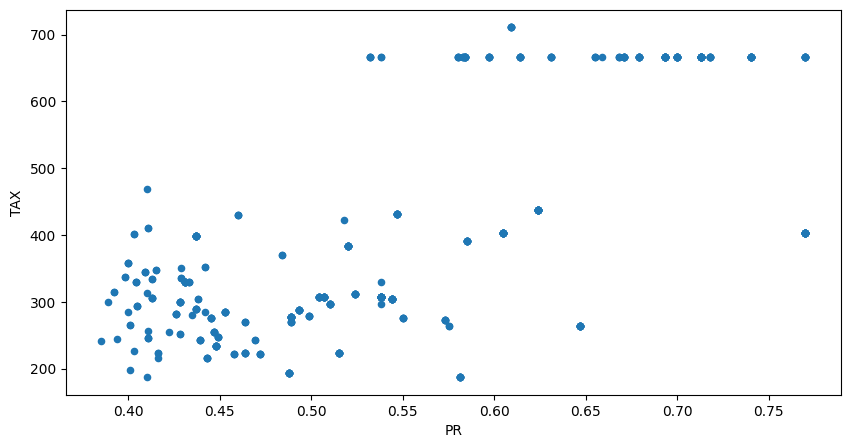

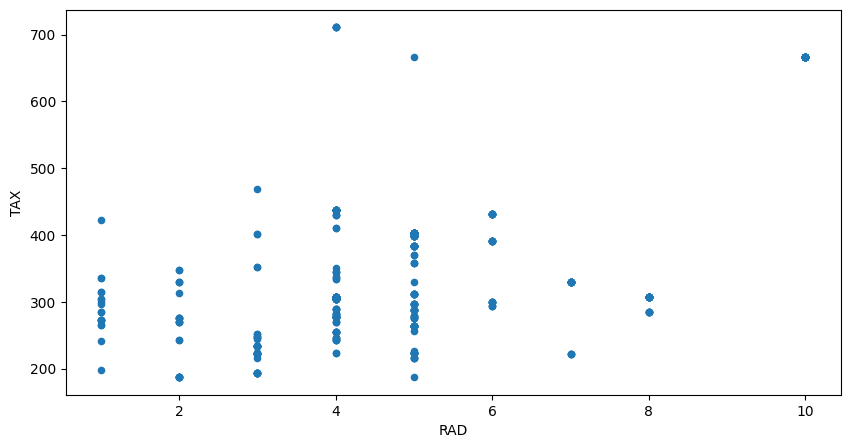

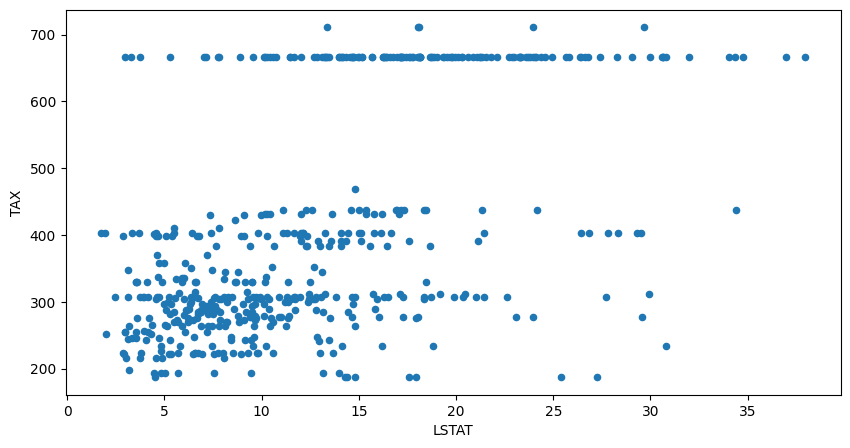

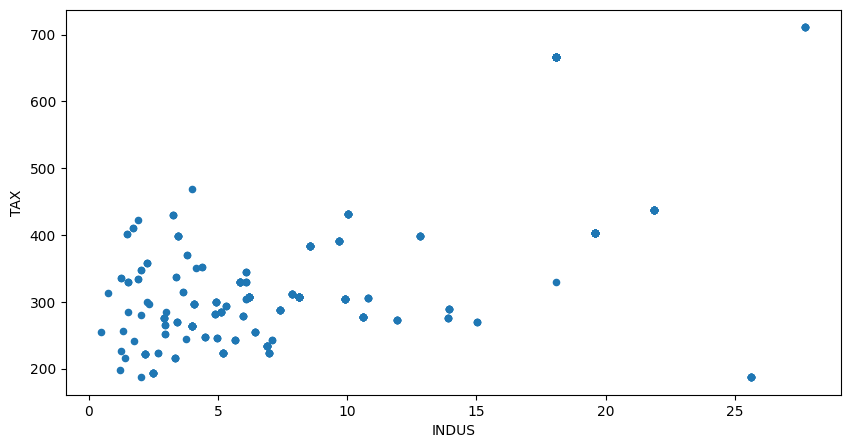

In [14]:
plots = ['CRIM','PR','RAD','LSTAT','INDUS']
Correlation_plots(plots)

A new dataframe is created with the selected features.

In [15]:
New_Data = Data.drop(columns=['AC','DIS','LS','RM','AGE','PTRATIO','DMT','MO'])
New_Data 

,CRIM,INDUS,PR,RAD,LSTAT,TAX
0,0.006320,2.31,0.538,1.0,4.98,296.0
1,0.027310,7.07,0.469,2.0,9.14,242.0
2,0.027290,7.07,0.469,2.0,4.03,242.0
3,0.032370,2.18,0.458,3.0,2.94,222.0
4,0.069050,2.18,0.458,3.0,5.33,222.0
...,...,...,...,...,...,...
501,0.062630,11.93,0.573,1.0,9.67,273.0
502,0.045270,11.93,0.573,1.0,9.08,273.0
503,0.060760,11.93,0.573,1.0,5.64,273.0
504,0.109590,11.93,0.573,1.0,6.48,273.0


### BUILDING A LINEAR REGRESSION MODEL

In [16]:
# building the Linear Regression model
X = New_Data.drop(columns=['TAX'])
y = New_Data['TAX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(404, 5)
(102, 5)
(404,)
(102,)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2:', model.score(X, y))
print('Adjusted R^2:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


R^2: 0.8185187956309248
Adjusted R^2: 0.8167039835872341
Mean Square Error: 5597.163591440858
Root Mean Square Error: 74.81419378327122


- Testing the model with 100% of the data

In [18]:
# Testing the model with 100% of the data
y_pred = model.predict(X)
print('R^2:', model.score(X, y))
print('Adjusted R^2:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean Square Error:', mean_squared_error(y, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y, y_pred)))


R^2: 0.8185187956309248
Adjusted R^2: 0.8167039835872341
Mean Square Error: 5123.027823199161
Root Mean Square Error: 71.57532971072617


## Explanation Of the Results
The R-squared value indicates the proportion of variance in the dependent variable (Tax) that can be explained by the independent variables (features) used in the linear regression model. An R-squared value of 0.818 means that approximately 81.8% of the variance in the Tax can be explained by the independent variables used in the model. Generally, a higher R-squared value indicates a better fit of the model to the data, although the exact value that is considered "good" depends on the context of the problem.
<br />
<br />
The Adjusted R-squared value is similar to the R-squared value, but it takes into account the number of independent variables used in the model. It penalizes the addition of irrelevant variables to the model and rewards the addition of relevant ones. In this case, the Adjusted R-squared value is 0.8167, which is slightly lower than the R-squared value. It indicates that the model is still a good fit but may have some degree of overfitting.
<br />
<br />
The Mean Square Error (MSE) and Root Mean Square Error (RMSE) are measures of the difference between the predicted values of the dependent variable and the actual values. The MSE is the average of the squared differences between the predicted and actual values, while the RMSE is the square root of the MSE. In this case, the MSE is 5597.16 and the RMSE is 74.81. Lower values of MSE and RMSE indicate better performance of the model in predicting the dependent variable. Overall, these values suggest that the model is performing reasonably well in predicting the Tax variable.

- saved as "model.pkl"

In [19]:
# Saving the model
import pickle
import os
with open('D:/YR2 Sem2/AI/Class/Assigmeent 3/Assignment 3- Datasets/Assignment 3- Dataset 1/Dataset/Model.pkl', 'wb') as file:
    pickle.dump(model, file)
    file.close()
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: d:\YR2 Sem2\AI\Class\Assigmeent 3\Assignment 3- Datasets\Assignment 3- Dataset 1\Question1


## Loading the model and the test data

In [20]:
# loading the model
def load_model():
    with open('D:/YR2 Sem2/AI/Class/Assigmeent 3/Assignment 3- Datasets/Assignment 3- Dataset 1/Dataset/Model.pkl', 'rb') as file:
        model = pickle.load(file)
        file.close()
    return model

In [21]:
# load the test dataset
test_data = Data = pd.read_csv('TestData.csv')

In [22]:
testdata = test_data.drop(columns=['PID','AC','DIS','LS','RM','AGE','PTRATIO','DMT','MO'])
testdata

,CRIM,INDUS,PR,RAD,LSTAT,TAX
0,0.03551,4.86,0.426,4,7.51,NaN
1,0.03659,4.86,0.426,4,6.72,NaN
2,0.04462,4.86,0.426,4,7.22,NaN
3,0.04113,4.86,0.426,4,5.29,NaN
4,0.08387,12.83,0.437,5,9.10,NaN
...,...,...,...,...,...,...
79,0.06905,2.18,0.458,3,5.33,NaN
80,0.03237,2.18,0.458,3,2.94,NaN
81,0.02729,7.07,0.469,2,4.03,NaN
82,0.02731,7.07,0.469,2,9.14,NaN


Checking and dealing with missing values

In [23]:
testdata.isnull().sum()

CRIM      0
INDUS     0
PR        0
RAD       0
LSTAT     0
TAX      84
dtype: int64

Finding the values for tax

In [24]:
def FunctionPredict(InputData):
    # Selecting the required columns
    new_model = load_model()
    # Predicting the output
    prediction = new_model.predict(InputData)

    return(prediction)
    

In [25]:
new_test_data = testdata.drop(columns=['TAX'])
print(FunctionPredict(new_test_data))

[270.2181744  270.89437232 270.53253643 272.1379973  368.19614348
 365.24844858 367.23111487 365.90339958 368.41682439 370.12059868
 322.48509718 323.40566662 320.22843396 322.36532743 279.22234247
 275.64240589 279.2724231  252.99523358 257.64471801 209.99304292
 387.666336   389.88537684 383.83237145 384.75321269 387.7268514
 390.11078743 269.63576961 177.36203429 267.46606957 226.70613933
 277.27334509 279.9656583  276.37889397 273.3239926  255.17130158
 243.07634538 253.04492569 256.66631269 259.86928172 260.057488
 262.11997367 263.36269238 264.07617743 229.78275747 227.75888547
 312.32742111 312.75701146 310.65601626 311.86632713 307.83463786
 306.0174847  299.89628179 312.04827207 302.26510007 310.27077926
 307.83576593 305.43494656 305.36895295 305.21141773 304.70374486
 303.48435954 306.31753178 307.5648333  304.51936267 308.76285154
 308.99992948 306.33963557 315.22760191 310.39195313 308.95861067
 310.58751164 325.42957053 327.67257369 322.41671762 324.83305597
 314.29710523

In [26]:
test_data.drop('TAX', axis=1, inplace=True)

In [27]:
# replace the value of tax in the test_data dataset with the predicted value
tax = FunctionPredict(new_test_data)
test_data['TAX'] = (tax)
test_data

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,1,0.03551,25.0,4.86,0,0.426,6.167,46.7,5.4007,4,19.0,390.64,7.51,0,270.218174
1,2,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,19.0,396.90,6.72,0,270.894372
2,3,0.04462,25.0,4.86,0,0.426,6.619,70.4,5.4007,4,19.0,395.63,7.22,0,270.532536
3,4,0.04113,25.0,4.86,0,0.426,6.727,NaN,5.4007,4,19.0,396.90,5.29,0,272.137997
4,5,0.08387,0.0,12.83,0,0.437,5.874,36.6,4.5026,5,18.7,396.06,9.10,0,368.196143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,0.06905,0.0,2.18,1,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,0,222.589787
80,81,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,0,224.332291
81,82,0.02729,0.0,7.07,1,0.469,7.185,61.1,4.9671,2,17.8,292.40,4.03,3,238.319687
82,83,0.02731,0.0,7.07,1,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,2,233.998975
